In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

In [123]:
df = pd.read_csv(r'C:\Users\thala\OneDrive\Desktop\Employee-Attrition-Predictor\Data\employee_attrition.csv')

In [124]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [126]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [127]:
# since there are no null values, lets proceed for next step and check for duplicates....

In [128]:
df.duplicated().sum()     # no duplicate record..now lets handle outliers..

np.int64(0)

In [161]:
'''Many companies have a minimum age to join, which is generally 18 years old and standard retirement age between 58 and 60.lets consider
these senerios and proceed further...'''

'Many companies have a minimum age to join, which is generally 18 years old and standard retirement age between 58 and 60.lets consider\nthese senerios and proceed further...'

In [130]:
df[(df['Age']<18) & (df['Age']>60)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [131]:
# since we have monthly income, we do not need DailyRate.

In [132]:
df['Department'].unique()      # seems fine..

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [133]:
print(f'Minimum_distance is {np.min(df['DistanceFromHome'])}\nMaximum_distance is {np.max(df['DistanceFromHome'])}')  # seems good

Minimum_distance is 1
Maximum_distance is 29


In [134]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [135]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [136]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

In [137]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [138]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [139]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [140]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [141]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

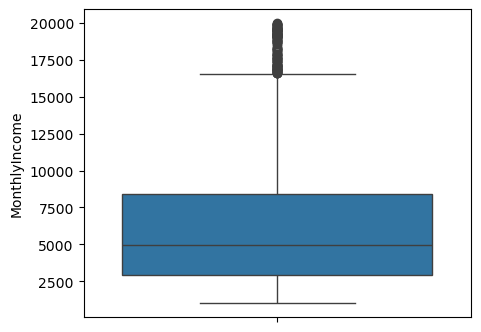

'This plot basically tells that there exists some outliers. But outliers in salary (MonthlyIncome) are not always bad, they are often genuine because salary naturally varies a lot between employees due to legitimate reasons such as:\n\nExperience level,\n\nJob role (junior vs manager),\n\nSkill set and specialization'

In [153]:
plt.figure(figsize = [5,4])
sns.boxplot(data = df['MonthlyIncome'])
plt.show()

'''This plot basically tells that there exists some outliers. But outliers in salary (MonthlyIncome) are not always bad, they are often genuine because salary naturally varies a lot between employees due to legitimate reasons such as:

Experience level,

Job role (junior vs manager),

Skill set and specialization'''

In [154]:
q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

df[(df['MonthlyIncome']<lower_bound) | (df['MonthlyIncome']>upper_bound)].JobRole.unique()

array(['Manager', 'Research Director'], dtype=object)

In [155]:
# see these are the one of the highest positions in a compnay. so ofcourse they get paid more naturally compared to others..

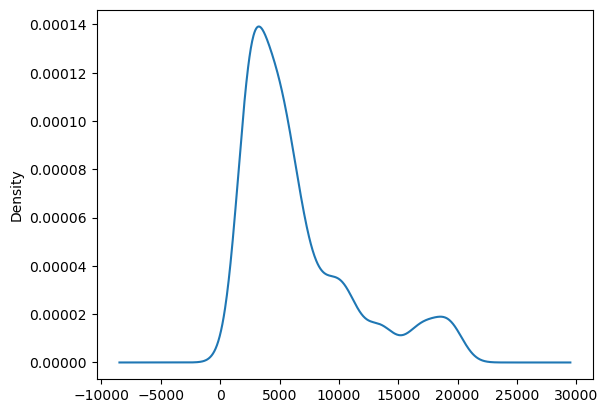

'Since these outliers represent real-world differences in job-roles, lets keep them and handle Right-Skewness (Using Log Transformation).'

In [156]:
df['MonthlyIncome'].plot.density()
plt.show()

'''Since these outliers represent real-world differences in job-roles, lets keep them and handle Right-Skewness (Using Log Transformation).'''

In [157]:
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome'])

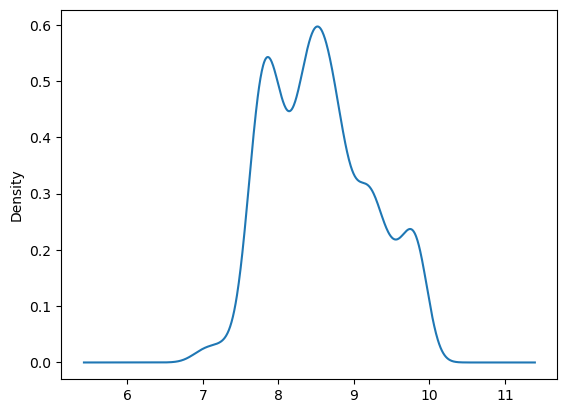

In [158]:
df['MonthlyIncome'].plot.density()
plt.show()

In [160]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [169]:
(df[['StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] < 0).sum()

StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
# Every things looks good..